<a href="https://colab.research.google.com/github/williamlidberg/RIP-Nature/blob/main/RIP_Nature_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone repository

In [1]:
!git clone https://github.com/williamlidberg/RIP-Nature
%cd /content/RIP-Nature/Results/
!ls

fatal: destination path 'RIP-Nature' already exists and is not an empty directory.
/content/RIP-Nature/Results
canada_post_harvest_buffers_william.cpg
canada_post_harvest_buffers_william.dbf
canada_post_harvest_buffers_william.dbf.xml
canada_pre_harvest_buffers_william.cpg
canada_pre_harvest_buffers_william.dbf
canada_pre_harvest_buffers_william.dbf.xml
RIP_Finland2022_post_harvest.csv
RIP_Finland2022_pre_harvest.csv
RIP-Nature
sweden_post_harvest_buffers_william.cpg
sweden_post_harvest_buffers_william.dbf
sweden_post_harvest_buffers_william.dbf.xml
sweden_pre_harvest_buffers_william.cpg
sweden_pre_harvest_buffers_william.dbf
sweden_pre_harvest_buffers_william.dbf.xml
Zonal_vaster_post_harvest.cpg
Zonal_vaster_post_harvest.dbf
Zonal_vaster_post_harvest.dbf.xml
Zonal_vaster_pre_harvest.cpg
Zonal_vaster_pre_harvest.dbf
Zonal_vaster_pre_harvest.dbf.xml


In [11]:
!pip install simpledbf

In [12]:
from simpledbf import Dbf5
import pandas as pd
# Sweden
sweden_post_harvest = Dbf5('/content/RIP-Nature/Results/sweden_post_harvest_buffers_william.dbf')
sweden_post_harvest = sweden_post_harvest.to_dataframe()
sweden_pre_harvest = Dbf5('/content/RIP-Nature/Results/sweden_pre_harvest_buffers_william.dbf')
sweden_pre_harvest = sweden_pre_harvest.to_dataframe()

# NB
nb_post_harvest = Dbf5('/content/RIP-Nature/Results/canada_post_harvest_buffers_william.dbf')
nb_post_harvest = nb_post_harvest.to_dataframe()
nb_pre_harvest = Dbf5('/content/RIP-Nature/Results/canada_pre_harvest_buffers_william.dbf')
nb_pre_harvest = nb_pre_harvest.to_dataframe()

# Finland
finland_post_harvest = pd.read_csv('/content/RIP-Nature/Results/Finland_post_harvest_joined.dbf')
finland_post_harvest = finland_post_harvest.to_dataframe()
finland_pre_harvest = pd.read_csv('/content/RIP-Nature/Results/Finland_pre_harvest_joined.dbf')
finland_pre_harvest = finland_pre_harvest.to_dataframe()

In [8]:
sweden_post_harvest.head()

,FID_,COUNT,AREA,SUM
0,0,85.0,340.0,0.0
1,1,294.0,1176.0,218.0
2,2,1749.0,6996.0,642.0
3,3,620.0,2480.0,410.0
4,4,1349.0,5396.0,494.0




*   COUNT is the number of 2 m x 2 m cells within the buffer polygon
*   Area in square meters of the buffer polygon
*   SUM is the number of canopy cells above 5 m. multiply it by to get area in square meters






In [13]:
len(finland_post_harvest)

22745

In [9]:
finland_post_harvest.head()

,ASTA_ID,post_raster_id,vuosi,5m_sum,sum_total,Canopy _percent
0,0,9455,2009,294.0,428.0,68.691589
1,0,9456,2013,307.0,426.0,72.065728
2,0,9457,2021,318.0,423.0,75.177305
3,1,9458,2009,1158.0,1762.0,65.720772
4,1,9459,2013,NaN,NaN,0.000000


The data needs to be 

*   ASTA_ID is the Id of the buffer polygon
*   vuosi = lidar scan year
*   5m_sum = number of pixels over 5 m within the polygon
*   sum_total = number of pixels within the polygon in total
*   canopy cover in the polygon







In [ ]:
import numpy as np
# Sweden
sweden_post_harvest['canopy_coverage'] = ((sweden_post_harvest['SUM'] * 4) / sweden_post_harvest['AREA'])*100
sweden_pre_harvest['canopy_coverage'] = ((sweden_pre_harvest['SUM'] * 4) / sweden_pre_harvest['AREA'])*100

# New Brunswick
nb_post_harvest['canopy_coverage'] = ((nb_post_harvest['SUM'] * 4) / nb_post_harvest['AREA'])*100
nb_pre_harvest['canopy_coverage'] = ((nb_pre_harvest['SUM'] * 4) / nb_pre_harvest['AREA'])*100
                                     


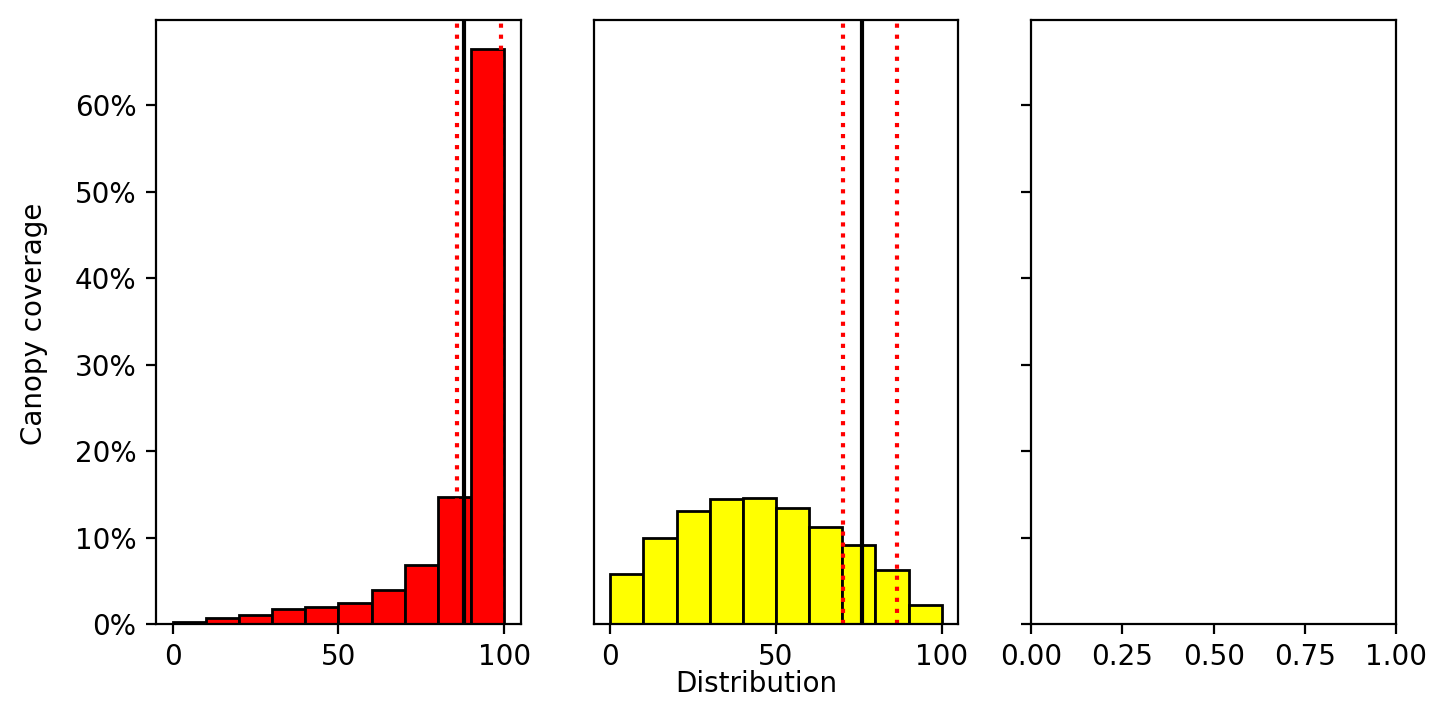

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
# post harvest
nb_coverage = nb_post_harvest['canopy_coverage']
sweden_coverage = sweden_post_harvest['canopy_coverage']
finland_coverage = sweden_post_harvest['canopy_coverage']
# before harvest
nb_before = nb_pre_harvest['canopy_coverage']
sweden_before = sweden_pre_harvest['canopy_coverage']
finland_before = sweden_pre_harvest['canopy_coverage']


nbins = 10
fig,ax = plt.subplots(1,3,figsize=(8,4),dpi=200,sharey=True)

fig.text(0.5, 0.04, 'Distribution', ha='center')
fig.text(0.04, 0.5, 'Canopy coverage', va='center', rotation='vertical')
ax[0].hist(nb_coverage,density=False, weights=np.ones_like(nb_coverage)*100./ len(nb_coverage), color = 'red', edgecolor='black')         
ax[1].hist(sweden_coverage,density=False, weights=np.ones_like(sweden_coverage)*100./ len(sweden_coverage), color = 'yellow', edgecolor='black')
#ax[2].hist(finland_coverage,density=False, weights=np.ones_like(finland_coverage)*100./ len(finland_coverage), color = 'blue', edgecolor='black')
ax[1].set(yticklabels=[])
#ax[2].set(yticklabels=[])
ax[1].tick_params(left=False)
#ax[2].tick_params(left=False)
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=100))

#before lines
# nb
ax[0].axvline(nb_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[0].axvline(nb_before.mean(),color='black')
ax[0].axvline(nb_before.quantile(0.75),color='red',linestyle = 'dotted')

# sweden
ax[1].axvline(sweden_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[1].axvline(sweden_before.mean(),color='black')
ax[1].axvline(sweden_before.quantile(0.75),color='red',linestyle = 'dotted')
# finland
#ax[2].axvline(finland_before.quantile(0.25),color='red',linestyle = 'dotted')
#ax[2].axvline(finland_before.mean(),color='black')
#ax[2].axvline(finland_before.quantile(0.75),color='red',linestyle = 'dotted')